In [1]:
from datasets import load_dataset
import pandas as pd
import re
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Embedding


ds = load_dataset("dair-ai/emotion", "split")
df_train = pd.DataFrame(ds['train'])
df_train.head()
df_test = pd.DataFrame(ds['test'])

url   = re.compile(r'https?://\S+')
mention  = re.compile(r'@\w+')
hashtags = re.compile(r'#\w+')

tokens_with_url  = sum(bool(url.search(t)) for t in df_train)
tokens_with_tag  = sum(bool(mention.search(t)) for t in df_train)
tokens_with_hastags = sum(bool(hashtags.search(t)) for t in df_train)
print(tokens_with_url, "tweets contain URLs;",
      tokens_with_tag, "contain @mentions",
      tokens_with_hastags, "contain Hashtags")

df_train['text'].str.lower()
MAX_VOCAB = 20000
MAX_LEN   = 50       

tok = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tok.fit_on_texts(df_train['text'])
tok.fit_on_texts(df_test['text'])

train_sequences = tok.texts_to_sequences(df_train['text'])
test_sequences = tok.texts_to_sequences(df_test['text'])

padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
padded_train_sequences = np.array(padded_train_sequences)
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
padded_test_sequences = np.array(padded_test_sequences)
y_train = np.array(df_train['label'])
y_test =np.array(df_test['label'])
X_train = np.array(df_train['text'])
X_test = np.array(df_test['text'])


EMBED_SIZE = 300
EPOCHS = 2
BATCH_SIZE = 128
VOCAB_SIZE = len(tok.word_index)


model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_LEN))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# Fit the model
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

d:\SRH\Emotion Detection Text\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anavn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anavn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anavn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0 tweets contain URLs; 0 contain @mentions 0 contain Hashtags


d:\SRH\Emotion Detection Text\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


ValueError: Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 300)

In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
print (device)

cuda



🚀 Using device: cuda


Epoch 1 Validation: 100%|██████████| 32/32 [00:00<00:00, 492.30it/s]


Epoch 1: Train Loss = 1.7488, Val Loss = 1.6962, Val Acc = 0.3520, F1 = 0.1833


Epoch 2 Validation: 100%|██████████| 32/32 [00:00<00:00, 556.17it/s]


Epoch 2: Train Loss = 1.6253, Val Loss = 1.5644, Val Acc = 0.3520, F1 = 0.1833


Epoch 3 Validation: 100%|██████████| 32/32 [00:00<00:00, 627.32it/s]


Epoch 3: Train Loss = 1.5382, Val Loss = 1.5070, Val Acc = 0.4640, F1 = 0.3475


Epoch 4 Validation: 100%|██████████| 32/32 [00:00<00:00, 687.96it/s]


Epoch 4: Train Loss = 1.4754, Val Loss = 1.4437, Val Acc = 0.5165, F1 = 0.3991


Epoch 5 Validation: 100%|██████████| 32/32 [00:00<00:00, 711.03it/s]


Epoch 5: Train Loss = 1.4097, Val Loss = 1.3790, Val Acc = 0.5210, F1 = 0.4036


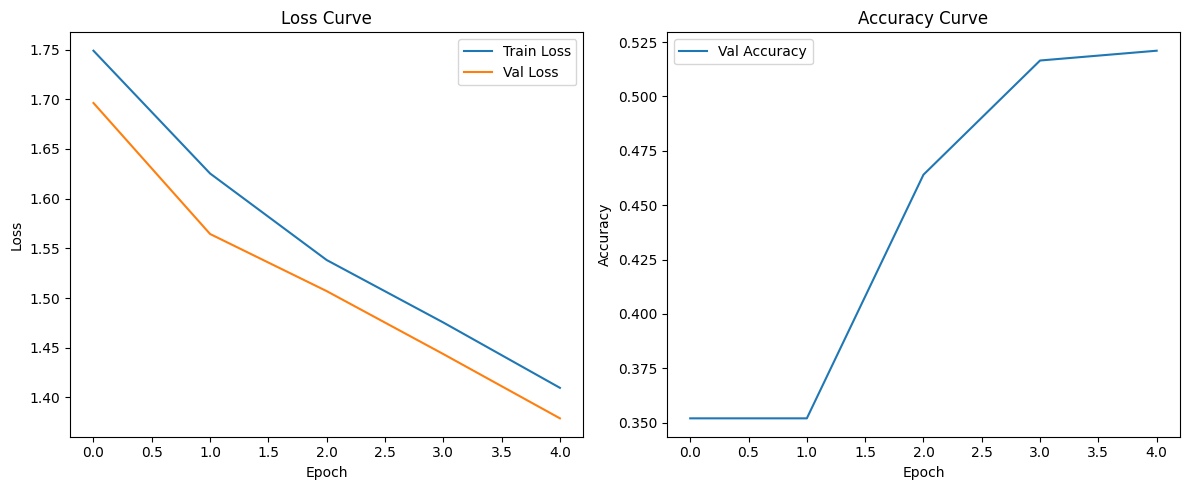

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
import numpy as np

# ===============================
# 1. Device Setup
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")
if device.type != "cuda":
    print("⚠️ Training on CPU will be slow. Consider enabling a GPU.")

# ===============================
# 2. Load Dataset
# ===============================
dataset = load_dataset("dair-ai/emotion", "split")
label_list = dataset['train'].features['label'].names

label_encoder = LabelEncoder()
label_encoder.fit(label_list)

train_texts = dataset['train']['text']
train_labels = dataset['train']['label']  # already integers

val_texts = dataset['validation']['text']
val_labels = dataset['validation']['label']

# ===============================
# 3. Sentence Embedding
# ===============================
embedder = SentenceTransformer('all-MiniLM-L6-v2')  # Small & fast transformer

train_embeddings = embedder.encode(train_texts, convert_to_tensor=True)
val_embeddings = embedder.encode(val_texts, convert_to_tensor=True)

# ===============================
# 4. Dataset Class
# ===============================
class EmotionDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = embeddings
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            'embedding': self.embeddings[idx],
            'label': self.labels[idx]
        }

train_dataset = EmotionDataset(train_embeddings, train_labels)
val_dataset = EmotionDataset(val_embeddings, val_labels)

# ===============================
# 5. Classifier Model (GRU as LMU proxy)
# ===============================
class EmotionClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_labels):
        super(EmotionClassifier, self).__init__()
        self.rnn = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_labels)
        )

    def forward(self, embeddings):
        embeddings = embeddings.unsqueeze(1)  # Add time dim
        output, _ = self.rnn(embeddings)
        last_hidden = output[:, -1, :]  # Last timestep
        return self.fc(last_hidden)

# ===============================
# 6. Training Setup
# ===============================
input_dim = train_embeddings.shape[1]
hidden_dim = 256
num_labels = len(label_list)

model = EmotionClassifier(input_dim, hidden_dim, num_labels).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# ===============================
# 7. Training & Validation Loop
# ===============================
train_losses, val_losses, val_accuracies = [], [], []

def train_model(num_epochs):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        all_preds, all_labels = [], []

        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
            embeddings = batch['embedding'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs, axis=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        train_acc = accuracy_score(all_labels, all_preds)
        train_losses.append(total_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0
        val_preds, val_labels_true = [], []

        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
                embeddings = batch['embedding'].to(device)
                labels = batch['label'].to(device)
                outputs = model(embeddings)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                preds = torch.argmax(outputs, axis=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels_true.extend(labels.cpu().numpy())

        acc = accuracy_score(val_labels_true, val_preds)
        f1 = f1_score(val_labels_true, val_preds, average='weighted')
        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(acc)

        print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}, Val Acc = {acc:.4f}, F1 = {f1:.4f}")

# Train
train_model(num_epochs=5)

# ===============================
# 8. 📈 Plot Loss & Accuracy
# ===============================
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.tight_layout()
plt.show()
